In [1]:
# import packages

import scipy.io as sio  # for loading matlab data

import numpy as np      # for numerical libs

from matplotlib.ticker import FuncFormatter # for custom bar plot labels

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
from statsmodels.tsa import stattools
from statsmodels.graphics import gofplots

# load data

In [2]:
data = sio.loadmat('MSFT_20141103.mat')
#data = sio.loadmat('INTC_20141103.mat')

In [3]:
LOB=data['LOB']

t = (np.array((LOB['EventTime'][0][0][:,0]))-3600000*9.5)*1e-3#time in seconds, measured from NASDAQ opening at 9:30am
bid = np.array(LOB['BuyPrice'][0][0]*1e-4)
bidvol = np.array(LOB['BuyVolume'][0][0]*1.0)
ask = np.array(LOB['SellPrice'][0][0]*1e-4)
askvol = np.array(LOB['SellVolume'][0][0]*1.0)
nMO = np.array(LOB['NumberMO'][0][0]*1.0)#total number of MOs submitted in the given 0.1 second interval
vMO = np.array(LOB['VolumeMO'][0][0]*1.0)#total volume of MOs submitted in the given 0.1 second interval
MO=np.array(LOB['MO'][0][0]*1.0)#information about market orders
dt = t[1]-t[0]
print(dt)
print(t[0:10])
print(len(t))
print(len(bid[:,0]))
print(t[-1])
tcur = 10*60*39

0.1
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
234000
234000
23400.0


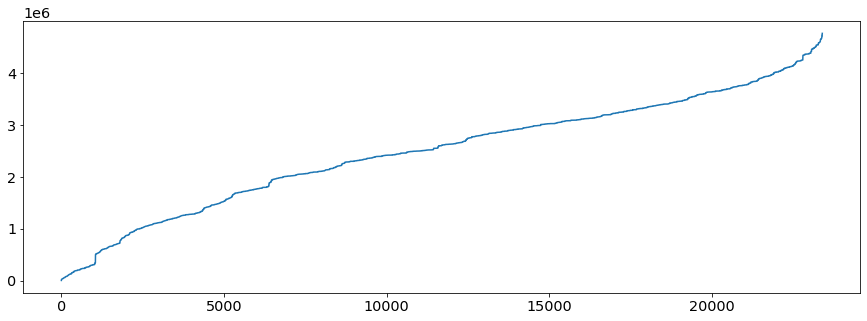

In [4]:
V = np.cumsum(vMO[:,0]+vMO[:,1])#traded volume, from the beginnign of the day
#up to time t, as a function of t
plt.plot(t,V)

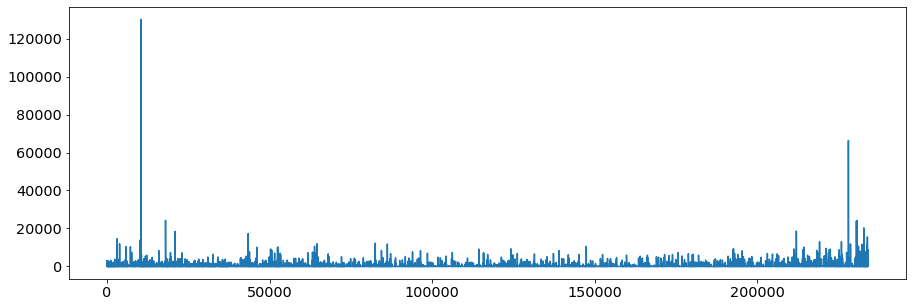

In [5]:
dV=np.diff(V)
plt.plot(dV)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:441: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


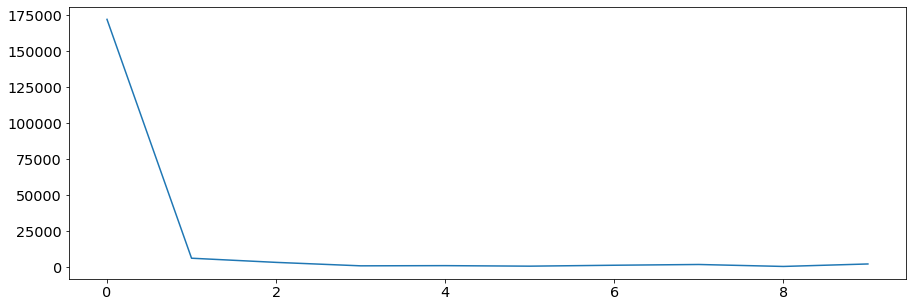

In [17]:
my_acf = stattools.acovf(dV)
plt.plot(my_acf[0:10])

(array([2.32685e+05, 6.58000e+02, 2.75000e+02, 1.37000e+02, 8.40000e+01,
        4.90000e+01, 3.40000e+01, 2.20000e+01, 1.50000e+01, 8.00000e+00,
        9.00000e+00, 6.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
        16000., 17000., 18000., 19000., 20000.]),
 <BarContainer object of 20 artists>)

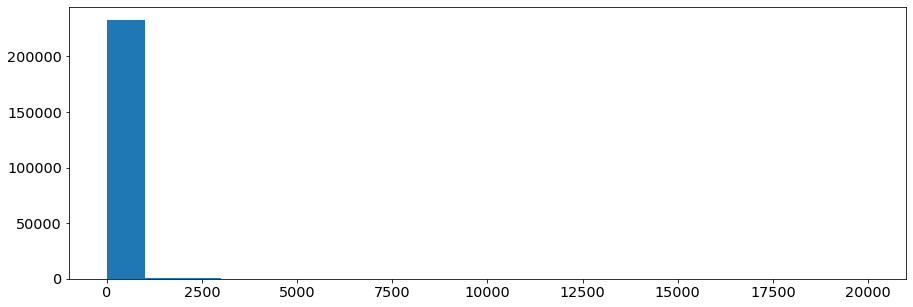

In [27]:
plt.hist(dV,20,(0,20000))